# Mini - project: Strokes

### Presenting: Ziv Zakalik and Shahar blas

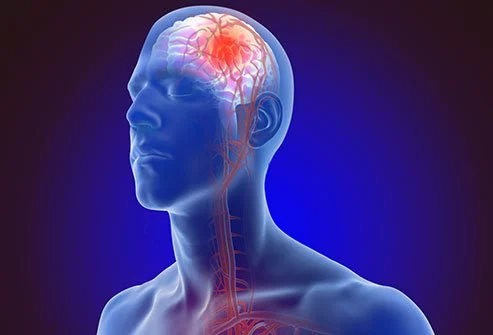

### חלק 1 - בחירת דאטאסט וסידורו לקראת עבודה: 

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns 
import numpy as np  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
pd.options.mode.chained_assignment = None  

In [2]:
strokes_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
strokes_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,60562,Female,21.0,0,0,No,Private,Rural,55.12,21.8,never smoked,0
1,37404,Male,42.0,0,0,Yes,Private,Urban,55.22,27.0,never smoked,0
2,43028,Male,66.0,0,0,Yes,Self-employed,Rural,55.23,28.9,Unknown,0
3,61300,Male,20.0,0,0,No,Private,Urban,55.25,20.4,never smoked,0
4,72547,Male,61.0,0,0,Yes,Private,Rural,55.26,33.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,27626,Female,60.0,0,0,No,Govt_job,Rural,266.59,25.5,never smoked,0
5106,10995,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0
5107,26267,Female,76.0,0,0,Yes,Self-employed,Urban,267.61,27.9,smokes,0
5108,22440,Female,49.0,0,0,Yes,Private,Urban,267.76,29.3,formerly smoked,0


#### הסרת הרשומות אשר המגדר בהן מוגדר להיות 'Other': 

In [3]:
strokes_data['gender'].replace({'Other' : pd.NA}, inplace=True)
strokes_data.dropna(inplace = True)
strokes_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,60562,Female,21.0,0,0,No,Private,Rural,55.12,21.8,never smoked,0
1,37404,Male,42.0,0,0,Yes,Private,Urban,55.22,27.0,never smoked,0
2,43028,Male,66.0,0,0,Yes,Self-employed,Rural,55.23,28.9,Unknown,0
3,61300,Male,20.0,0,0,No,Private,Urban,55.25,20.4,never smoked,0
4,72547,Male,61.0,0,0,Yes,Private,Rural,55.26,33.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,27626,Female,60.0,0,0,No,Govt_job,Rural,266.59,25.5,never smoked,0
5106,10995,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0
5107,26267,Female,76.0,0,0,Yes,Self-employed,Urban,267.61,27.9,smokes,0
5108,22440,Female,49.0,0,0,Yes,Private,Urban,267.76,29.3,formerly smoked,0


In [4]:
strokes_data.info()
strokes_data['id'].nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4908 non-null   int64  
 1   gender             4908 non-null   object 
 2   age                4908 non-null   float64
 3   hypertension       4908 non-null   int64  
 4   heart_disease      4908 non-null   int64  
 5   ever_married       4908 non-null   object 
 6   work_type          4908 non-null   object 
 7   Residence_type     4908 non-null   object 
 8   avg_glucose_level  4908 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     4908 non-null   object 
 11  stroke             4908 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.5+ KB


4908

#### מציאת ערכי BMI חריגים:

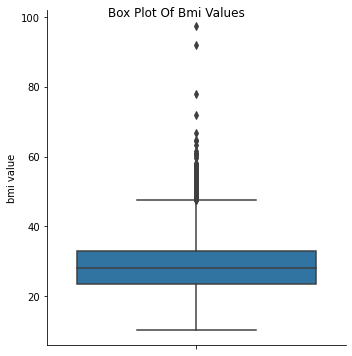

In [5]:
bmi_box = sns.catplot(kind="box",
                       data=strokes_data , y='bmi')
bmi_box.fig.suptitle('Box Plot Of Bmi Values')
bmi_box.set(ylabel='bmi value')

#### נבחן את ההשפעה של הסרת ערכים אלו על הדאטא:

In [6]:
Q1 = strokes_data['bmi'].quantile(0.25)
Q3 = strokes_data['bmi'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter = (strokes_data['bmi'] >= Q1 - 1.5 * IQR) & (strokes_data['bmi'] <= Q3 + 1.5 *IQR)
strokes_data.loc[filter]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,60562,Female,21.0,0,0,No,Private,Rural,55.12,21.8,never smoked,0
1,37404,Male,42.0,0,0,Yes,Private,Urban,55.22,27.0,never smoked,0
2,43028,Male,66.0,0,0,Yes,Self-employed,Rural,55.23,28.9,Unknown,0
3,61300,Male,20.0,0,0,No,Private,Urban,55.25,20.4,never smoked,0
4,72547,Male,61.0,0,0,Yes,Private,Rural,55.26,33.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,27626,Female,60.0,0,0,No,Govt_job,Rural,266.59,25.5,never smoked,0
5106,10995,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0
5107,26267,Female,76.0,0,0,Yes,Self-employed,Urban,267.61,27.9,smokes,0
5108,22440,Female,49.0,0,0,Yes,Private,Urban,267.76,29.3,formerly smoked,0


שרטטנו  box plot כדי למצוא ערכים חריגים של BMI וגילינו שיש כ-100 רשומות עם ערך BMI חריג. לאחר חיפוש באינטרנט גילינו כי הערכים שקיבלנו כחריגים (בין 45 ל-90 BMI) הם אפשריים ולכן בחרנו להשאיר אותם.


#### מציאת ערכי רמת גלוקוז בדם חריגים:


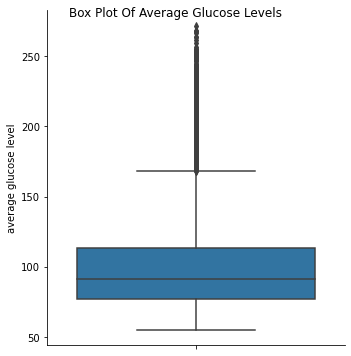

In [48]:
glucose_box = sns.catplot(kind="box",
                       data=strokes_data , y='avg_glucose_level')
glucose_box.fig.suptitle('Box Plot Of Average Glucose Levels')
glucose_box.set(ylabel='average glucose level')

#### נבחן את השפעה של הסרת ערכים אלו על הדאטא:

In [8]:
Q1 = strokes_data['avg_glucose_level'].quantile(0.25)
Q3 = strokes_data['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter = (strokes_data['avg_glucose_level'] >= Q1 - 1.5 * IQR) & (strokes_data['avg_glucose_level'] <= Q3 + 1.5 *IQR)
strokes_data.loc[filter]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,60562,Female,21.00,0,0,No,Private,Rural,55.12,21.8,never smoked,0
1,37404,Male,42.00,0,0,Yes,Private,Urban,55.22,27.0,never smoked,0
2,43028,Male,66.00,0,0,Yes,Self-employed,Rural,55.23,28.9,Unknown,0
3,61300,Male,20.00,0,0,No,Private,Urban,55.25,20.4,never smoked,0
4,72547,Male,61.00,0,0,Yes,Private,Rural,55.26,33.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4475,56090,Female,65.00,0,0,Yes,Self-employed,Rural,167.31,27.1,never smoked,0
4476,58202,Female,50.00,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
4477,63912,Female,77.00,0,0,Yes,Govt_job,Rural,167.59,34.3,formerly smoked,0
4478,57679,Male,1.08,0,0,No,children,Urban,167.66,18.7,Unknown,0


שרטטנו  box plot כדי למצוא ערכים חריגים של רמת גלוקוז ממוצעת וראינו כי קיים מספר גבוה של ערכים חריגים (כ- 700) אך לאחר חיפוש באינטרנט גילינו כי אנשים בעלי סכרת יכולים להגיע גם לרמת גלוקוז ממוצעת של עד 300 ולכן סביר שהדאטא תקין (הערך הכי גבוה הוא 271.4), ובעל שונות גבוהה.


### חלק 2 - Exploratory data analysis 

### סעיף א - התפלגות הנתונים

#### התפלגות מטופלים אשר לקו בשבץ:

'the amount of each unique value:'

0    4699
1     209
Name: stroke, dtype: int64

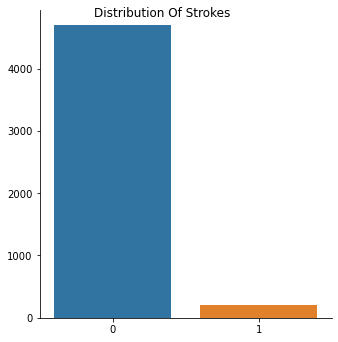

In [51]:
strokes = sns.catplot(x = 'stroke', kind = 'count', data = strokes_data)
strokes.set_ylabels('')
strokes.set_xlabels('')
strokes.fig.suptitle('Distribution Of Strokes')
display('the amount of each unique value:', strokes_data['stroke'].value_counts())

 ניכר כי המדגם שלנו כולל הרבה פחות אנשים שקיבלו שבץ (209 אנשים שחוו שבץ לעומת 4700 שלא), ולכן סביר כי מדובר במדגם אקראי המייצג את האוכלוסיה הכללית - אחוז יחסית קטן מהאוכלוסיה חווה שבץ.
בהמשך נדאג לשים לב לכך שהמידע הנוגע לאנשים אשר לא חוו שבץ הוא משמעותית רב יותר ונסיק מסקנות בהתאם.


#### התפלגות מגדר:

'the amount of each unique value:'

Female    2897
Male      2011
Name: gender, dtype: int64

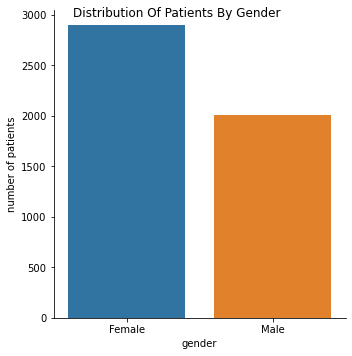

In [9]:
gender=sns.catplot(x = 'gender', kind = 'count', data = strokes_data)
gender.set_ylabels('number of patients')
gender.fig.suptitle('Distribution Of Patients By Gender')
display('the amount of each unique value:', strokes_data['gender'].value_counts())

 ניכר כי הדאטא כולל יותר נשים מגברים. כאשר מדובר בנתונים רפואיים ובמאפיינים ביולוגיים, ההבדלים הפיזיים בין נשים וגברים יכולים להשפיע רבות על הנטייה למחלות בכלל, ולשבץ בפרט. בהמשך העבודה נאלץ להיות מודעים להבדלים הללו ולהתייחס אליהם בהתאם.


#### התפלגות גיל:

In [10]:
bins=[-1,10,20,30,40,50,60,70,100]
labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71+']
binned_values = np.histogram(strokes_data['age'], bins=bins)[0].tolist() # use [0] to just get the counts
df_hist = pd.DataFrame.from_dict(dict(zip(labels, binned_values)), orient='index').reset_index()
df_hist.columns = ['ranges', 'counts']

'Median: '

44.0

'Mean: '

42.86881010594947

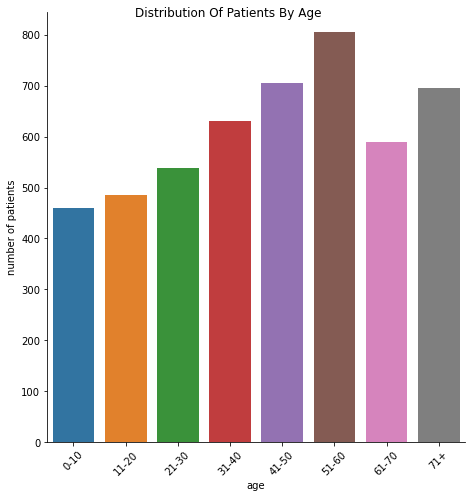

In [11]:
age=sns.catplot(x = 'ranges', y = 'counts', kind = 'bar', data = df_hist)
age.set_xlabels('age')
age.set_ylabels('number of patients')
age.fig.suptitle('Distribution Of Patients By Age')
age.fig.set_size_inches(7,7)
age.set_xticklabels(rotation=45)

display("Median: ",strokes_data['age'].median())
display("Mean: ",strokes_data['age'].mean())

נשים לב כי הדאטא מכיל נתונים אודות אנשים בטווח גילאים רחב, החל מתינוקות ועד אנשים בגילאי +80, כאשר הגיל הנפוץ ביותר הוא סביבות 50-60. 
הגיל הממוצע הוא 42  והחציון 44.
נשים לב שקיים לנו יותר דאטא על אנשים בטווח הגילאים 30-60, אך קיימת כמות לא קטנה של מטופלים בכל אחת מקבוצות הגיל, ולכן נוכל להסיק מסקנות אמינות עבור כלל הקבוצות.

#### התפלגות הייפר לחץ

'the amount of each unique value:'

0    4457
1     451
Name: hypertension, dtype: int64

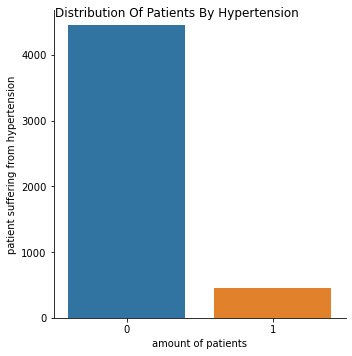

In [13]:
hypertension = sns.catplot(x = 'hypertension', kind = 'count', data = strokes_data)
hypertension.set_ylabels('patient suffering from hypertension')
hypertension.set_xlabels('amount of patients')
hypertension.fig.suptitle('Distribution Of Patients By Hypertension')
display('the amount of each unique value:', strokes_data['hypertension'].value_counts())

נשים לב שבדאטא שלנו מספר האנשים בעלי לחץ דם גבוה יחסית נמוך לעומת מספר האנשים בעלי לחץ דם רגיל דבר שמתיישב עם ההנחה כי אחוז האנשים בעולם עם לחץ דם גבוה בצורה חריגה הוא יחסית נמוך לשאר האוכלוסיה.


#### התפלגות BMI:

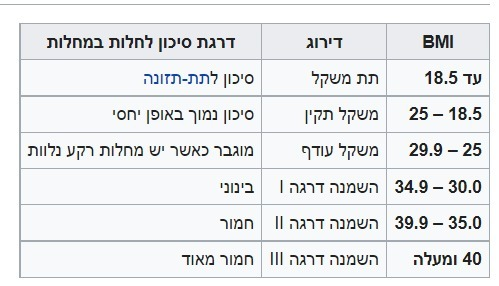

'the amount of each unique value:'

,ranges,counts
0,0-18.5,337
1,18.5-25,1242
2,25-29.9,1409
3,30 - 34.9,1000
4,35 - 39.9,506
5,40+,414


'Median: '

28.1

'Mean: '

28.894559902200477

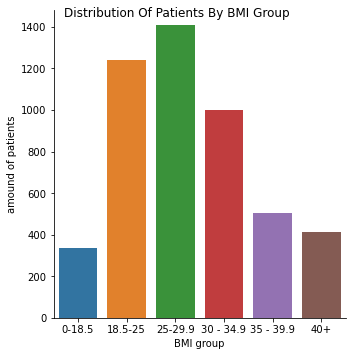

In [14]:
bins=[-1,18.5,25,30,35, 40, 100]
labels = ['0-18.5', '18.5-25', '25-29.9', '30 - 34.9', '35 - 39.9', '40+']
binned_values = np.histogram(strokes_data['bmi'], bins=bins)[0].tolist() # use [0] to just get the counts
df_hist = pd.DataFrame.from_dict(dict(zip(labels, binned_values)), orient='index').reset_index()
df_hist.columns = ['ranges', 'counts']
bmi = sns.catplot(x = 'ranges', y = 'counts', kind = 'bar', data = df_hist)
bmi.set_ylabels('amound of patients')
bmi.set_xlabels('BMI group')
bmi.fig.suptitle('Distribution Of Patients By BMI Group')
display('the amount of each unique value:', df_hist)
display("Median: ",strokes_data['bmi'].median())
display("Mean: ",strokes_data['bmi'].mean())

כדי להבין יותר טוב את משתנה הBMI חיפשנו באינטרנט מה ההבדלים בין המספרים השונים והאם יש משמעות שונה לBMI שונה. גילינו כי קיימת חלוקה המגדירה האם אנשים הם בתת משקל, משקל תקין או בעודף משקל. לפי הטבלה הזו בדקנו את הדאטא שלנו ואת התפלגות הBMI.
נראה כי בדאטא חלק משמעותי מאוד מהאנשים הם בעלי משקל עודף. 
ממוצע הBMI בדאטא הוא 28.9, והחציון הוא 28.1 - נתונים אשר דומים לאלו אשר נאספו בארה"ב ב2016.
לא ידוע לנו היכן נאסף הדאטא, אך נוכל להסיק שסביר שהדאטא נאסף בצורה תקינה מכיוון שהוא אכן משקף בקירוב את האוכלוסיה הכללית בארה"ב.
נשים לב כי בדאטא יש לנו כ- 400 אנשים בקטגוריית תת משקל, נזכור כי יש לנו כמעט 500 רשומות של ילדים  שהBMI שלהם (ע"פ ויקיפדיה) יותר נמוך משל אדם בוגר. וזה יכול להסביר למה יש כ400 רשומות של אנשים בעלי תת משקל.


#### התפלגות סוג עבודה:

'the amount of each unique value:'

Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

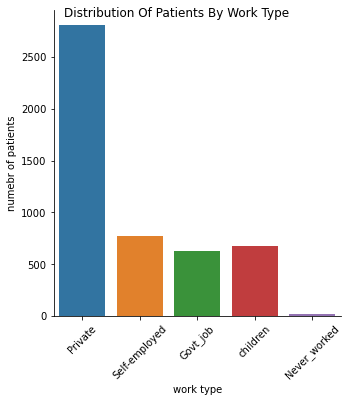

In [15]:
work_type = sns.catplot(x='work_type', data=strokes_data, kind = 'count')
work_type.set_xticklabels(rotation=45)
work_type.set_ylabels('numebr of patients')
work_type.set_xlabels('work type')
work_type.fig.suptitle('Distribution Of Patients By Work Type')
display('the amount of each unique value:', strokes_data['work_type'].value_counts())

In [16]:
min_never_worked=strokes_data[strokes_data.work_type=='Never_worked']['age'].min()
max_never_worked=strokes_data[strokes_data.work_type=='Never_worked']['age'].max()
display('The minimum age of people who never worked is', min_never_worked)
display('The maximum age of people who never worked is', max_never_worked)

'The minimum age of people who never worked is'

13.0

'The maximum age of people who never worked is'

23.0

סוגי העבודה השונים מחולקים בדאטא ל5 קטגוריות: עצמאי, שכיר, משרה ממשלתית, ילדים (שלא יכולים לעבוד כי לא בגיל שמותר בו לעבוד), וקטגוריה נוספת של אנשים שמעולם לא עבדו. 
לאחר בדיקה בדאטא ניראה כי אנשים שמעולם לא עבדו הינם אנשים בגילאי 13-23, כלומר ברובם ילדים ובני נוער. כתוצאה מכך, נוכל להניח כי הן האוכלוסיה זו והן אוכלוסיית הילדים, על בסיס מסקנות קודמות, יהיו בסיכון נמוך יותר לשבץ מוחי.
נשים לב כי קיים משמעותית יותר דאטה לגבי שכירים בתהליך הסקת המסקנות בהמשך.


#### התפלגות רמת גלוקוז ממוצעת בדם:


Text(0.5, 0.98, 'Distribution Of Glucose levels')

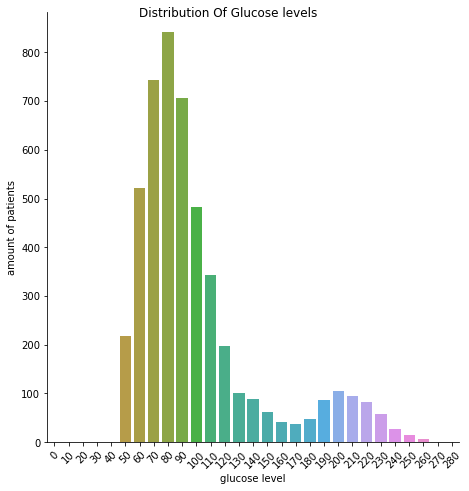

In [17]:
glucose_bins = np.arange(0, 300, 10)
binned_values = np.histogram(strokes_data['avg_glucose_level'], bins=glucose_bins)[0].tolist() # use [0] to just get the counts
df_hist = pd.DataFrame.from_dict(dict(zip(glucose_bins, binned_values)), orient='index').reset_index()
df_hist.columns = ['ranges', 'counts']
avg_glucose_level=sns.catplot(x = 'ranges', y = 'counts', kind = 'bar', data = df_hist)
avg_glucose_level.set_xticklabels(rotation = 45)
avg_glucose_level.fig.set_size_inches(7,7)
avg_glucose_level.set_ylabels('amount of patients')
avg_glucose_level.set_xlabels('glucose level')
avg_glucose_level.fig.suptitle('Distribution Of Glucose levels')

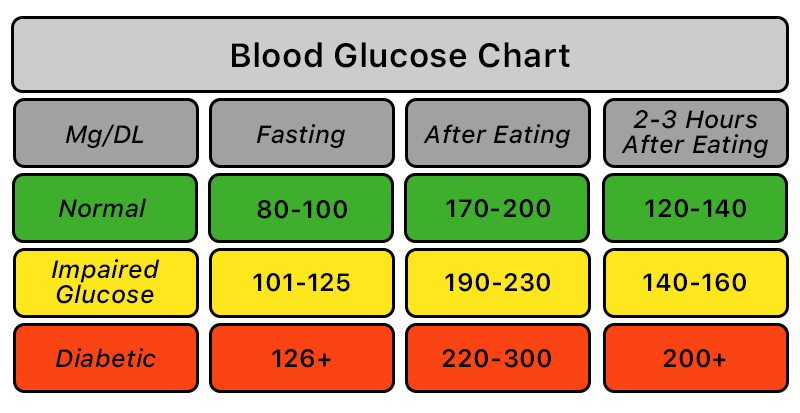


ניתן לראות בדאטא כי משתנה הגלוקוז נע בין הערכים 50 ל274. כדי להבין יותר טוב את משמעות הערכים , חיפשנו באינטרנט מידע לגבי משמעות ערכי הגלוקוז השונים.
ביררנו עם רופא, ולרוב בדיקות גלוקוז נערכות לאחר צום, ולכן נשתמש בעמודה הרלוונטית בתמונה במסקנות הבאות.
נשים לב שרמת הגלוקוז של רוב הנבדקים היא סביב הטווח הנורמלי - 80 עד 100, כצפוי מהטבלה לעיל.
בנוסף נשים לב שקיים זנב ארוך של נבדקים בעלי רמת גלוקוז מעל הטווח הנורמלי.


### סעיף ב - בדיקת קורלציה בין המשתנים

#### יחס המטופלים שחוו שבץ ביחס למין:

Text(0.5, 0.98, 'Ratio Of Patients That Had Strokes For Each Gender')

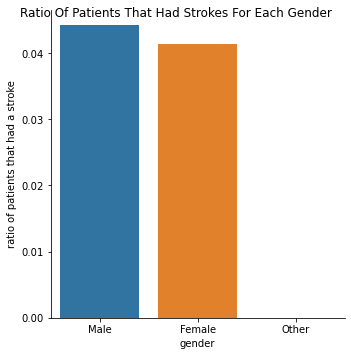

In [18]:
males_vs_females = strokes_data.groupby('gender', as_index = False).agg(stroke_ratio = ('stroke', 'mean'))
gender_stroke_ratio = sns.catplot(y="stroke_ratio",x='gender', data=males_vs_females, kind = 'bar', order = ['Male', 'Female','Other'])
gender_stroke_ratio.set_ylabels('ratio of patients that had a stroke')
gender_stroke_ratio.fig.suptitle('Ratio Of Patients That Had Strokes For Each Gender')

בהמשך לבדיקה של כמות הגברים והנשים בדאטא רצינו לוודא מהו אחוז הגברים והנשים אשר חוו שבץ מוחי כדי שנוכל להבין האם מין המטופל משפיע על הסיכוי לחוות שבץ מוחי.
גילינו כי אחוז הגברים החולים גבוהה יותר מאחוז הנשים החולות, אך לא ברמה ניכרת.


#### יחס המטופלים שחוו שבץ ביחס לגיל: 

'the amount of each unique value:'

,stroke_ratio
0-10,0.000000
11-20,0.001972
21-30,0.000000
31-40,0.007716
41-50,0.020950
51-60,0.053030
61-70,0.074468
71+,0.159265


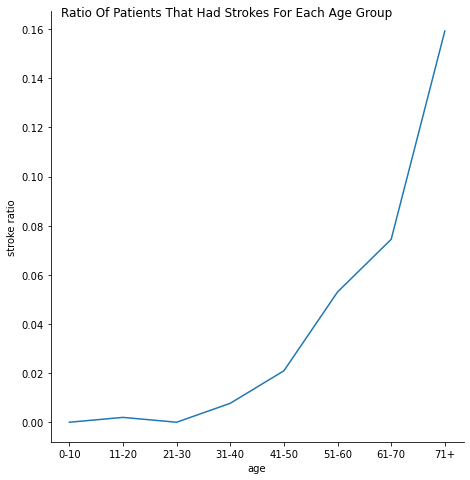

In [19]:
bins=[-1,10,20,30,40,50,60,70,100]
labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71+']
grouped_by_age = strokes_data.groupby(pd.cut(strokes_data['age'],bins), as_index = False).agg(stroke_ratio = ('stroke', 'mean'))
grouped_by_age.index = labels

age_vs_stroke = sns.relplot(y="stroke_ratio",x=grouped_by_age.index, data=grouped_by_age, kind='line');
age_vs_stroke.fig.set_size_inches(7,7)
age_vs_stroke.set_xlabels('age')
age_vs_stroke.set_ylabels('stroke ratio')
age_vs_stroke.fig.suptitle('Ratio Of Patients That Had Strokes For Each Age Group')
display('the amount of each unique value:', grouped_by_age)

לאחר שבדקנו את התפלגות הגילאים בדאטא רצינו לבדוק  האם יש קשר בין גיל המטופל לבין יחס המקרים של אנשים אשר חוו שבץ. גילינו כי אחוז המטופלים הללו אצלנו בדאטא עולה ככל שהגיל עולה.
הממצאים הנ"ל תואמים את האינטואיציה הבסיסית שלנו - ככל שאדם מבוגר יותר קיים סיכוי גבוה יותר שהוא יחווה שבץ מוחי - הן בגלל שעבר פרק זמן ארוך יותר מאז שהוא נולד, והן בגלל שהמערכת החיסונית נחלשת והגוף חשוף ליותר סיכונים. 
ניתן לראות שהעלייה ביחס המטופלים אשר חוו שבץ נעשית תלולה יותר ככל שהגיל עולה, ומתחילה בצורה משמעותית וברורה לעין לאחר גיל 30.


#### יחס המטופלים שחוו שבץ ביחס ללחץ דם גבוה ברמה חריגה:

'the amount of each unique value:'

,hypertension,stroke_ratio
0,0,0.033431
1,1,0.133038


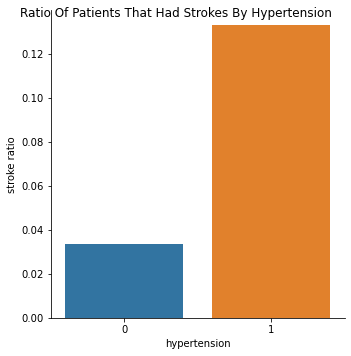

In [20]:
hyper_tension_vs_strokes = strokes_data.groupby('hypertension', as_index = False).agg(stroke_ratio = ('stroke', 'mean'))
hyper_vs_stroke = sns.catplot(y="stroke_ratio",x='hypertension', data=hyper_tension_vs_strokes, kind = 'bar', order = [0, 1])
hyper_vs_stroke.set_ylabels('stroke ratio')
hyper_vs_stroke.set_xlabels('hypertension')
hyper_vs_stroke.fig.suptitle('Ratio Of Patients That Had Strokes By Hypertension')
display('the amount of each unique value:', hyper_tension_vs_strokes)

בחלק הראשון של הפרויקט, ראינו כי על פי המקורות שציינו, לחץ דם גבוה מעלה את הסיכוי ללקות בשבץ מוחי.
רצינו לראות האם הטענה הנ"ל משתקפת בדאטא,ואכן ניתן לראות כי אחוז האנשים שקיבלו שבץ משמעותית גבוה יותר (כמעט פי 6!) אצל אוכלוסיית האנשים עם לחץ דם גבוה. 
ניתן להוריד את לחץ הדם בצורה יחסית פשוטה ויעילה בעזרת שינוי באורח החיים ובמקרים קיצוניים יותר תרופות, ולכן זו מסקנה חשובה. 


#### יחס המטופלים שחוו שבץ ביחס לBMI:

'the amount of each unique value:'

,stroke_ratio
0-10,NaN
11-20,0.005587
21-30,0.044391
31-40,0.052525
41-50,0.051672
51-60,0.015152
61-70,0.000000
71+,0.000000


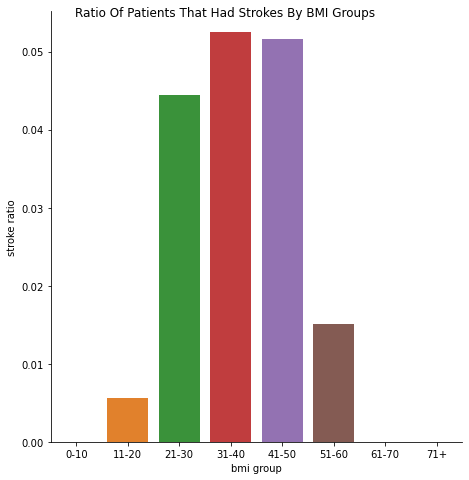

In [21]:
grouped_by_bmi = strokes_data.groupby(pd.cut(strokes_data['bmi'],bins), as_index = False).agg(stroke_ratio = ('stroke', 'mean'))
grouped_by_bmi.index = labels
bmi_vs_stroke = sns.catplot(y="stroke_ratio",x=labels, data=grouped_by_bmi, kind='bar')
bmi_vs_stroke.fig.set_size_inches(7,7)
bmi_vs_stroke.set_xlabels('bmi group')
bmi_vs_stroke.set_ylabels('stroke ratio')
bmi_vs_stroke.fig.suptitle('Ratio Of Patients That Had Strokes By BMI Groups')
display('the amount of each unique value:', grouped_by_bmi)

בהמשך לבדיקת ההתפלגות של הBMI, רצינו לבדוק את הקשר בין BMI גבוה לבין שבץ מוחי. ניתן לראות כי לאנשים בעלי משקל תקין יש כ-3% מקרי שבץ לעומת אנשים במשקל עודף, להם יש כ5% מקרי שבץ עבור כלל קבוצות ה-BMI מעל 25.
הנתונים הללו לא מתיישבים עם ההנחה שלנו - כי ככל שהBMI גבוה יותר, לחולה יש סיכוי גבוה יותר לחוות שבץ.
נוכל לחשוב על מספר הסברים לתופעה הנ"ל:
כמות לא מספיקה של מידע לגבי מטופלים אשר חוו שבץ.
כמות לא מספיקה של מידע עבור מטופלים בעלי BMI מעל 35.
ייתכן כי ההנחה שלנו שגויה, וכי הסיכוי לחוות שבץ זהה עבור כל קבוצות הBMI מעל זו התקינה - במקורות מצוין כי עודף משקל הוא גורם תורם לעליית הסיכוי לחוות שבץ, אך לא מצוין כי הסיכון עולה ככל שעולה המשקל.


#### יחס המטופלים שחוו שבץ ביחס לתחום עיסוק:

'the amount of each unique value:'

,work_type,stroke_ratio
0,Govt_job,0.044444
1,Never_worked,0.000000
2,Private,0.045196
3,Self-employed,0.068387
4,children,0.001490


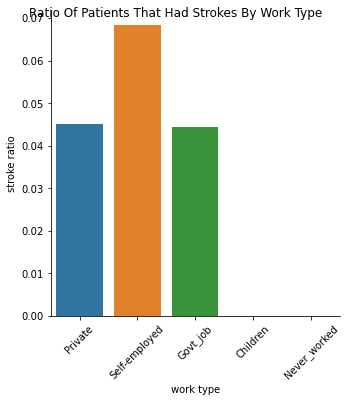

In [22]:
worktype_vs_strokes = strokes_data.groupby('work_type', as_index = False).agg(stroke_ratio = ('stroke', 'mean'))
work_vs_stroke_plot = sns.catplot(y="stroke_ratio",x='work_type',
                                  data=worktype_vs_strokes, kind = 'bar', order = ['Private',
                                                                                   'Self-employed',
                                                                                    'Govt_job',
                                                                                     'Children', 'Never_worked'])
work_vs_stroke_plot.set_xticklabels(rotation = 45)
work_vs_stroke_plot.set_ylabels('stroke ratio')
work_vs_stroke_plot.set_xlabels('work type')
work_vs_stroke_plot.fig.suptitle('Ratio Of Patients That Had Strokes By Work Type')
display('the amount of each unique value:', worktype_vs_strokes)

לאחר שבדקנו את מספר הרשומות שיש עבור כל סוג עבודה, רצינו לראות האם למקום העבודה יש השפעה על אחוז האנשים שקיבלו שבץ. נראה כי אחוז העצמאיים שקיבלו שבץ הוא 6% והוא גבוה יותר מאנשים שעובדים במשרות ממשלתיות או כשכירים, כאשר במשרות אלה אחוז החולים הוא כ-4.5%. 
בנוסף, בגרף זה ניתן לראות כי אין בדאטא אפילו אדם אחד אשר לא עבד מעולם וחווה שבץ, ובנוסף גם אחוז הילדים שחוו שבץ קרוב מאוד לאפס, כפי שצפינו.



#### יחס המטופלים שחוו שבץ ביחס לרמת קלוקוז ממוצעת בדם:

Text(0.5, 0.98, 'Ratio Of Patients That Had Strokes By Average Glucose Level')

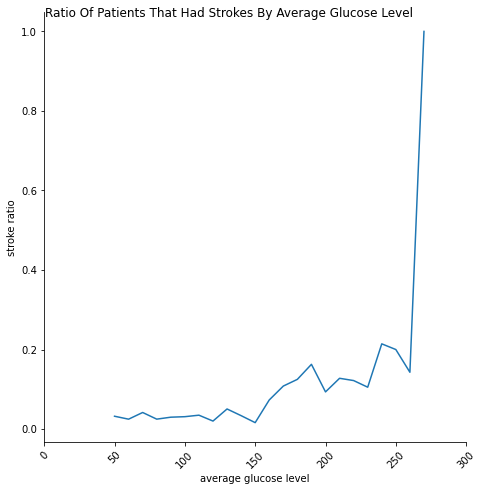

In [23]:
grouped_by_avg_glucose_level = strokes_data.groupby(pd.cut(strokes_data['avg_glucose_level'],glucose_bins),
                                                    as_index = False).agg(stroke_ratio = ('stroke', 'mean'))
grouped_by_avg_glucose_level.index = glucose_bins[:29]
avg_glucose_level = sns.relplot(y="stroke_ratio",x=grouped_by_avg_glucose_level.index, data=grouped_by_avg_glucose_level, kind='line')

avg_glucose_level.set_xticklabels(rotation=45)
avg_glucose_level.fig.set_size_inches(7,7)
avg_glucose_level.set_ylabels('stroke ratio')
avg_glucose_level.set_xlabels('average glucose level')
avg_glucose_level.fig.suptitle('Ratio Of Patients That Had Strokes By Average Glucose Level')

בהמשך לבדיקת התפלגות הגלוקוז, רצינו לבדוק את הקשר בין רמת גלוקוז בדם לבין שבץ מוחי. ניתן לראות בהתאם לציפיות, החל מערך גלוקוז ממוצע של 150, חלה עליה עקבית באחוז מקרי השבץ.
נשים לב שהמידע עבור ערכים מעל 120 הוא לא רב, ולכן המסקנות בעלות אמינות נמוכה יותר.
בנוסף, ניתן לראות קפיצה חריגה - מפחות מ-20% מהנבדקים עד ל100% מהם בקצה הגרף - הקפיצה נובעת מכך שקיים נבדק אחד בעל ערך גלוקוז כזה, והוא חווה שבץ.
לכן לא נתייחס לקפיצה הזו במסקנותינו.


#### יחס המטופלים שחוו שבץ ביחס למקום מגורים:

'The amount of patients that live in urban areas is:'

2490

'The amount of patients that live in rural areas is:'

2418

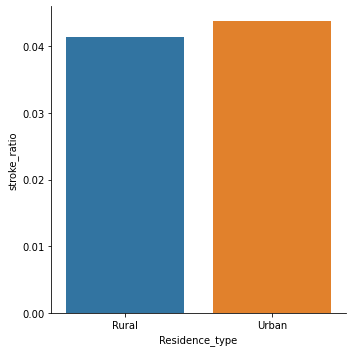

In [52]:
rural_vs_urban = strokes_data.groupby('Residence_type', as_index = False).agg(stroke_ratio = ('stroke', 'mean'))
sns.catplot(y="stroke_ratio",x='Residence_type', data=rural_vs_urban, kind = 'bar')
display("The amount of patients that live in urban areas is:", len(strokes_data[strokes_data.Residence_type == 'Urban']))
display("The amount of patients that live in rural areas is:", len(strokes_data[strokes_data.Residence_type == 'Rural']))

רצינו לבדוק האם למקום המגורים יש השפעה על הסיכוי ללקות בשבץ. ניתן לראות כי כמות האנשים בדאטא שגרים באזור עירוני הוא 2490 לעומת 2418 שגרים באזורים כפריים. לעומת זאת אין הבדל משמעותי של אחוז האנשים שלקו בשבץ בשני סוגי המגורים. היינו מצפים לראות שיהיה אחוז גבוה יותר של מקרים באזורים עירוניים.

#### נבדוק אם נוכל לזהות קורלציה מובהקת בין רמת גלוקוז ממוצעת בדם לBMI: 

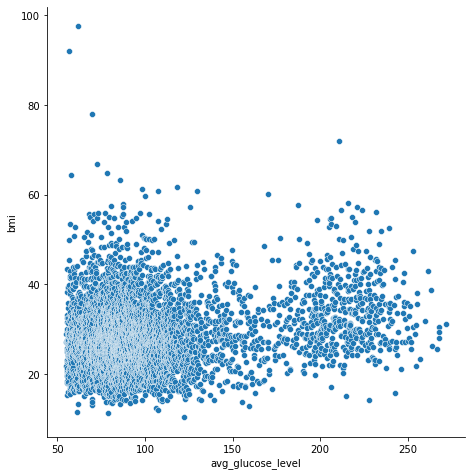

In [24]:
corr_bmi_glucose_graph = sns.relplot(y="bmi", x="avg_glucose_level", data=strokes_data);
corr_bmi_glucose_graph.fig.set_size_inches(7,7)

התעניינו במיוחד בקשר שבין רמת גלוקוז בדם לBMI, כיוון שהחלטנו שנבחר להתעמק באחד מהם. מתוך אינטואיציה ולא מתוך היכרות מעמיקה חשבנו שיש קורלציה בין BMI לבין רמת הגלוקוז בדם וחשבנו שהקשר הזה יכול להיות מעניין להמשך המחקר שלנו. 
על פי הגרף לא ניתן לזהות קורלציה מובהקת בין שני המשתנים.


### חלק 3 - Estimation and hypothesis testing 

שאלת המחקר שלנו – האם יש הבדל בין ממוצע ה-BMI של אנשים אשר חוו שבץ, לבין אנשים שלא.
על סמך המחקר שביצענו לפני תחילת העבודה על הפרויקט אנו יודעים כי אחד מגורמי הסיכון הידועים לאירוע מוחי הוא עודף משקל. 
</br>
במהלך ניתוח הנתונים שמנו לב כי אחוז המטופלים שחוו שבץ בעלי עודף משקל נע בין 4.5% לבין 5.5%. ציפינו לראות עלייה באחוזי האנשים שקיבלו שבץ ככל שמדד הBMI העלה אך הופתענו לגלות שלא כך המצב בדאטא שלנו. כן ראינו שיש הבדל בין אנשים בעלי BMI תקין לבעלי עודף משקל, כאשר לאנשים עם משקל תקין אחוז האנשים שחוו שבץ הינו 2.9%.


H0 – אין הבדל בין ממוצע הBMI אצל אנשים באוכלוסייה שחוו אירוע מוחי לבין אנשים באוכלוסיה שלא. כלומר, הפרש הממוצעים בין שתי הקבוצות הינו 0. </br>
H1 – יש הבדל בין ממוצע הBMI אצל אנשים באוכלוסייה שחוו אירוע מוחי לבין אנשים באוכלוסיה שלא. כלומר, קיים הפרש בין ממוצעי שתי הקבוצות (שאיננו 0).

In [26]:
df_with_stroke = strokes_data[strokes_data.stroke == 1]
mean_strokes = df_with_stroke['bmi'].mean()
print('The mean bmi of the people that had a stroke is ', mean_strokes)

The mean bmi of the people that had a stroke is  30.47129186602871


In [27]:
df_no_stroke = strokes_data[strokes_data.stroke == 0]
mean_no_strokes = df_no_stroke['bmi'].mean()
print('The mean bmi of the people that did not have a stroke is ', mean_no_strokes)

The mean bmi of the people that did not have a stroke is  28.82443072994255


נשתמש ב-Boostrap בשביל לבדוק את ההשערה:

In [28]:
# function that returns the difference in averages of "column_name" grouping by "grouping_var"
def diff_of_avgs(df, column_name, grouping_var):
    grpby_var = df.groupby(grouping_var)
    avgs = grpby_var[column_name].mean()
    return avgs[1] - avgs[0]

def bootstrap_mean_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped differences between two sample averages:
      original_sample: df containing the original sample
      column_name: name of column containing the variable to average
      grouping_var: name of variable according to which to group
      num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_mean_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_mean_diff = diff_of_avgs(bootstrap_sample, column_name, grouping_var)
        bstrap_mean_diffs[i] = resampled_mean_diff
    
    return bstrap_mean_diffs

# run the bootstrap procedure
bstrap_diffs = bootstrap_mean_difference(strokes_data, 'bmi', 'stroke', 5000)

The 95% boostsrap confidence interval for difference between population means [0.7863408092971866, 2.5525702222217816]


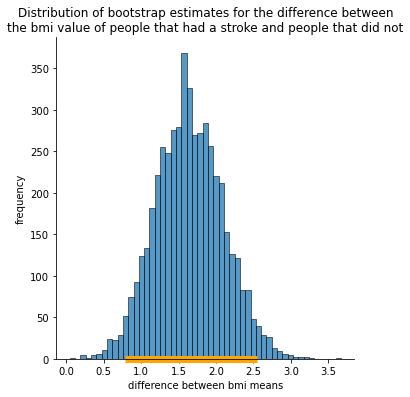

In [29]:
# Get the endpoints of the 95% confidence interval
left_end = np.percentile(bstrap_diffs, 2.5, interpolation='higher')
right_end = np.percentile(bstrap_diffs, 97.5, interpolation='higher')
print('The 95% boostsrap confidence interval for difference between population means', [left_end,right_end])

# visualize results
ax = sns.displot(bstrap_diffs)
plt.hlines(y=0, xmin=left_end, xmax=right_end, colors='orange', linestyles='solid', lw=7, clip_on=False)
ax.set(xlabel='difference between bmi means', ylabel='frequency',
       title='Distribution of bootstrap estimates for the difference between\nthe bmi value of people that had a stroke and people that did not')

ממצאים: רווח הסמך של שקיבלנו אינו כולל את הערך 0, ולכן נוכל לשלול את השערת האפס ברמת סמך של 95% – כלומר קיים הבדל בין מדד ה-BMI של אנשים שחוו שבץ לאלה שלא.
הממצאים שקיבלנו תומכים במידע שגילינו לפני תחילת המחקר והוא משקל עודף הוא אחד מגורמי הסיכון לאירוע מוחי.


### חלק 4 -  Prediction 

בהמשך ישיר לממצאים שהצגנו לעיל, נרצה לחזות האם אדם כלשהו חווה אירוע מוחי או לא – המשתנה שאותו נרצה לחזות הוא 'stroke'. 


In [30]:
strokes_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,60562,Female,21.0,0,0,No,Private,Rural,55.12,21.8,never smoked,0
1,37404,Male,42.0,0,0,Yes,Private,Urban,55.22,27.0,never smoked,0
2,43028,Male,66.0,0,0,Yes,Self-employed,Rural,55.23,28.9,Unknown,0
3,61300,Male,20.0,0,0,No,Private,Urban,55.25,20.4,never smoked,0
4,72547,Male,61.0,0,0,Yes,Private,Rural,55.26,33.2,Unknown,0


סידור הנתונים ובחירת פיצ'רים: 

In [31]:
# use get_dummies to create a dummy variable for every label in the feature:
encoded_df = pd.DataFrame(strokes_data)
encoded_df.drop(['id', 'heart_disease','work_type','Residence_type'], axis='columns', inplace=True)
encoded_df['smoking_status'].replace({'Unknown' : pd.NA}, inplace=True)
encoded_df.dropna(inplace=True)
encoded_df = pd.get_dummies(encoded_df, columns=['gender', 'ever_married', 'smoking_status'])
first_column = encoded_df.pop('stroke')
encoded_df.insert(0, 'stroke', first_column)
encoded_df


,stroke,age,hypertension,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,21.0,0,55.12,21.8,1,0,1,0,0,1,0
1,0,42.0,0,55.22,27.0,0,1,0,1,0,1,0
3,0,20.0,0,55.25,20.4,0,1,1,0,0,1,0
5,0,31.0,0,55.27,32.5,1,0,0,1,1,0,0
7,0,78.0,0,55.32,29.6,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,60.0,0,266.59,25.5,1,0,1,0,0,1,0
5106,0,76.0,1,267.60,30.5,0,1,0,1,0,1,0
5107,0,76.0,0,267.61,27.9,1,0,0,1,0,0,1
5108,0,49.0,0,267.76,29.3,1,0,0,1,1,0,0


#### בדיקת קורלציה בין המשתנים השונים:

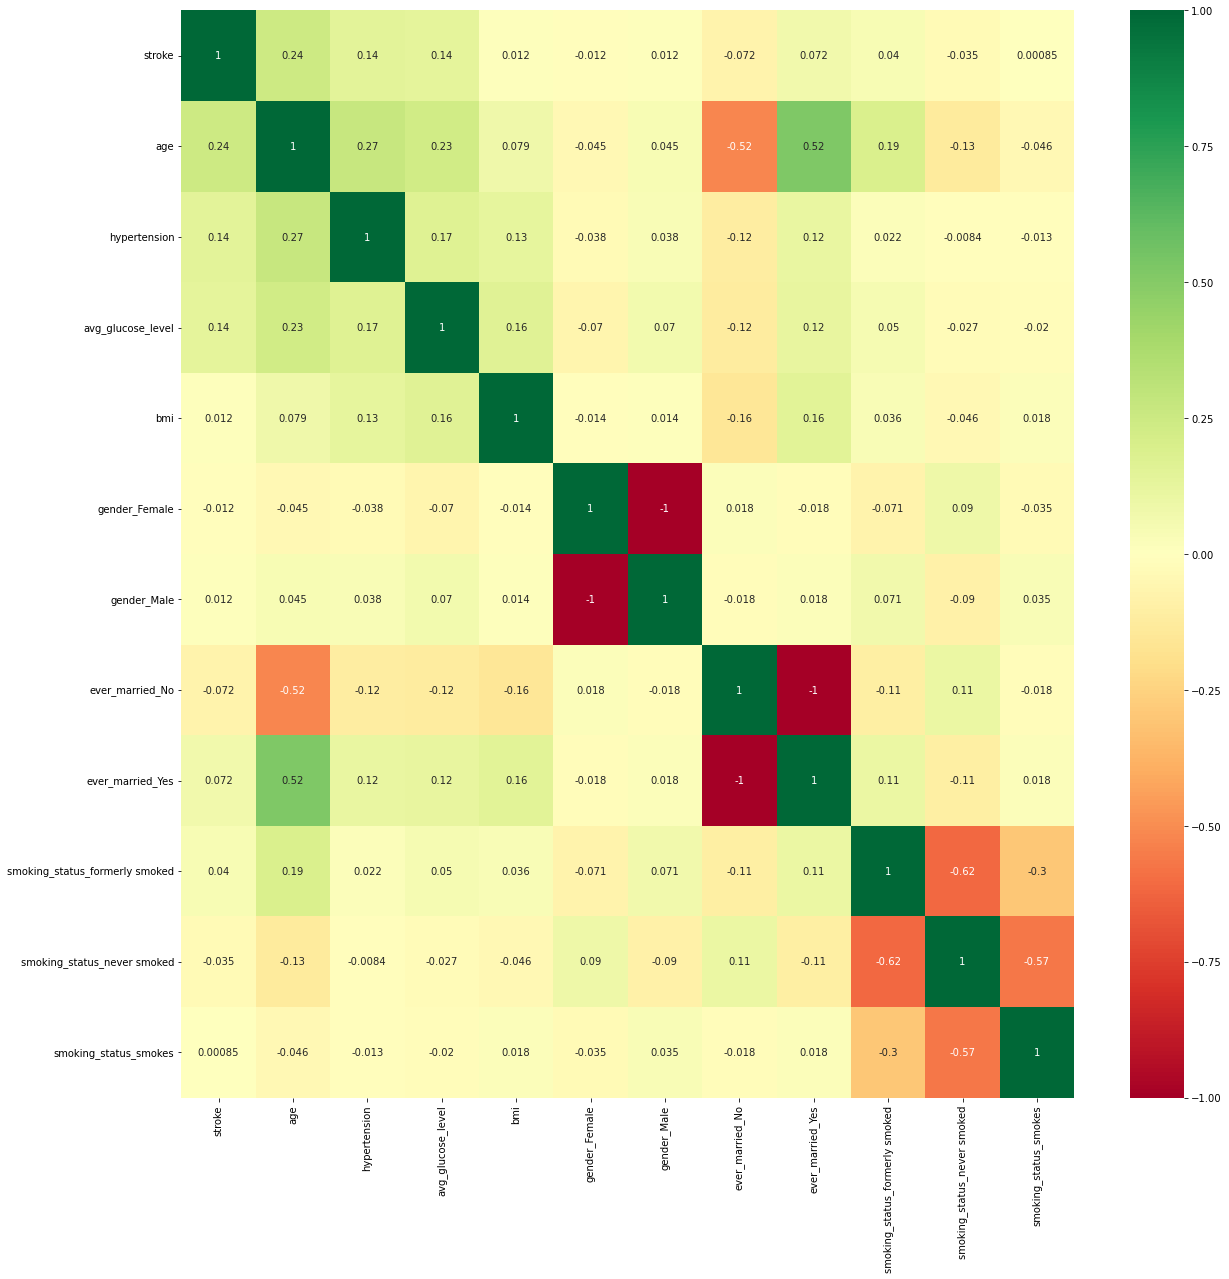

In [32]:
correlations = encoded_df.corr()

#plot heat map
plt.figure(figsize=(20,20))
g=sns.heatmap(correlations,annot=True,cmap="RdYlGn")


#### נרמול של הנתונים כהכנה לקראת הסיווג:

In [33]:
X = encoded_df.iloc[:, 1:]
Y = encoded_df['stroke'] # labels

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [34]:
# use Cross-Validation to check which k has the highest acuuracy score:
k_avg_score = np.zeros(21)
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, scaled_X_train, Y_train, cv=5)
    k_avg_score[k] = cv_scores.mean()

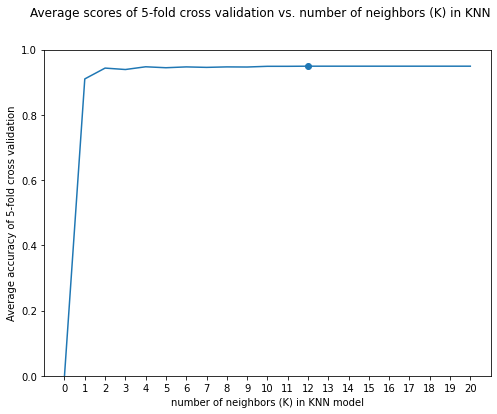

In [35]:
# plot of the average scores of 5-fold cross validation vs. number of neighbors (K) in KNN:
fig, ax = plt.subplots()
ax.plot(k_avg_score)
ax.set_xticks(np.arange(0, 21));
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score), np.max(k_avg_score)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 5-fold cross validation vs. number of neighbors (K) in KNN')
ax.set_xlabel('number of neighbors (K) in KNN model')
ax.set_ylabel('Average accuracy of 5-fold cross validation');

In [36]:
print(f"best average accuracy cv score is: {np.max(k_avg_score)}, for number of neighbors(K) = {np.argmax(k_avg_score)}")

best average accuracy cv score is: 0.9492700729927007, for number of neighbors(K) = 12


#### בחינה של המודל מול סט המבחן:

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# fit the model on the entire train set
knn = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score))
knn.fit(scaled_X_train, Y_train)

# test the model on the test set
test_score = knn.score(scaled_X_test, Y_test)
print(f"Test accuracy score is: {test_score}")

# Compute a confusion matrix
predictions = knn.predict(X=scaled_X_test) # get the classifier's predictions 
cmtx = pd.DataFrame(
    confusion_matrix(y_true=Y_test, y_pred=predictions, labels=[0, 1]), 
    index=['real: 0', 'real: 1'], 
    columns=['pred: 0', 'pred: 1']
)
print(cmtx)
print('precision: ', precision_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]))
print('recall: ', recall_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]))

Test accuracy score is: 0.9401459854014599
         pred: 0  pred: 1
real: 0      644        0
real: 1       41        0
precision:  0.0
recall:  0.0


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


אמנם ה-accuracy גבוה אבל מדד ה-precision וה-recall  שווה ל-0. כלומר המסווג לא הצליח בכלל לזהות את האנשים החולים.
ניתן להסביר את כישלון המסווג בכך שבדאטא שלנו יש אחוז מאוד קטן של מספר האנשים שלקו בהתקף לב- 209 לעומת 4700 רשומות שזה כ-4.2% חולים מתוך כלל הדאטא. זאת אומרת שמספר הרשומות של חולים שהמסווג מאמן עליהן קטן מאוד ביחס לשאר הרשומות לאנשים שאינם חולים. אמנם הדאטא שלנו נאסף להערכתנו בצורה אקראית, אבל הוא אינו מאוזן ומקשה על המסווג לבצע אימון שיביא לתוצאות טובות. לכן לאחר ביצוע ניסיון זה, החלטנו לבצע ניסיון נוסף.


### נסיון שני-חלוקות שונות של הנתונים:

לאחר מחקר קצר באינטרנט גילינו כי אחת הדרכים להתמודד עם דאטא לא מאוזן היא לאמן את המסווג על חלק קטן מהדאטא שהוא כן מאוזן, כלומר במקום לקחת 80% מהדאטא ולאמן את המסווג עליו לקחת 100 רשומות אקראיות של אנשים שלקו בשבץ ועוד 200 רשומות אקראיות של אנשים שלא לקו בשבץ, וכך ליצור איזון כדי לאמן את המסווג בצורה טובה יותר. לאחר שמאמנים את המסווג על המקבץ הקטן שבחרנו נבדוק אותו על כל שאר הדאטא ונראה האם הוא עובד בצורה טובה יותר.
ואכן לאחר שאימנו את המסווג בניסיון השני הוא הצליח לחזות בצורה טובה יותר.

In [38]:
stroked = encoded_df[encoded_df.stroke == 1].sample(100)
un_stroked = encoded_df[encoded_df.stroke == 0].sample(200)
merged = pd.concat([stroked,un_stroked])
X_train = merged.iloc[:, 1:]
Y_train = merged['stroke'] # labels
all_but_merged = pd.merge(encoded_df,merged, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
X_test = all_but_merged.iloc[:, 1:]
Y_test = all_but_merged['stroke'] # labels
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [39]:
# use Cross-Validation to check which k has the highest acuuracy score:
k_avg_score = np.zeros(21)
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, scaled_X_train, Y_train, cv=5)
    k_avg_score[k] = cv_scores.mean()

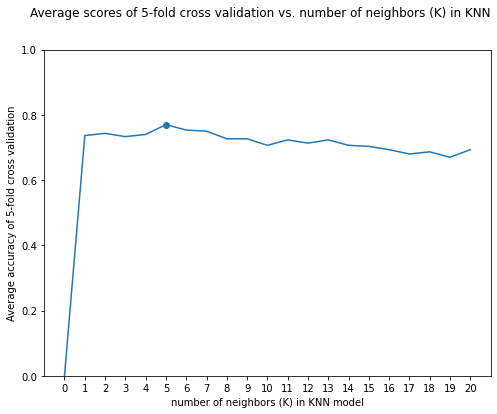

In [40]:
# plot of the average scores of 5-fold cross validation vs. number of neighbors (K) in KNN:
fig, ax = plt.subplots()
ax.plot(k_avg_score)
ax.set_xticks(np.arange(0, 21));
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score), np.max(k_avg_score)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 5-fold cross validation vs. number of neighbors (K) in KNN')
ax.set_xlabel('number of neighbors (K) in KNN model')
ax.set_ylabel('Average accuracy of 5-fold cross validation');

In [41]:
print(f"best average accuracy cv score is: {np.max(k_avg_score)}, for number of neighbors(K) = {np.argmax(k_avg_score)}")

best average accuracy cv score is: 0.77, for number of neighbors(K) = 5


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# fit the model on the entire train set
knn = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score))
knn.fit(scaled_X_train, Y_train)

# test the model on the test set
test_score = knn.score(scaled_X_test, Y_test)
print(f"Test accuracy score is: {test_score}")

# Compute a confusion matrix
predictions = knn.predict(X=scaled_X_test) # get the classifier's predictions
cmtx = pd.DataFrame(
    confusion_matrix(y_true=Y_test, y_pred=predictions, labels=[0, 1]), 
    index=['real: 0', 'real: 1'], 
    columns=['pred: 0', 'pred: 1']
)
print(cmtx)
print('precision: ', precision_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]))
print('recall: ', recall_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]))

Test accuracy score is: 0.79648
         pred: 0  pred: 1
real: 0     2448      597
real: 1       39       41
precision:  0.06426332288401254
recall:  0.5125


בניסיון זה שיפרנו את הrecall ואת ה-precision. עדיין הוא לא עובד בצורה מיטבית אבל בהחלט ניראה שיש שיפור מהניסיון הראשון. ניתן לראות כי השיפור אינו מיטבי וכי מדד ה-accuracy קטן מהניסיון הראשון אבל ה-precision עלה ל-6% וה-recall הגיע לכמעט 50%. הזכרנו כי מדד ה-recall הוא החשוב ביותר ועל כן נראה כי המסווג שלנו לא מיטבי עדיין.
צפינו כי המסווג לא יהיה טוב כיוון שאין לנו מספיק נתונים על אנשים שלקו בשבץ מוחי, אך השיפור בתוצאות המסווג החדש ניכר.
נשים לב כי מדד ה-recall נמוך, וזה אומר כי האלגוריתם לא מנבא בצורה מיטבית את כמות החולים מתוך כלל החולים הקיימים – הדבר החשוב ביותר. מבחינתנו זה לא טוב מספיק למה שאנו צריכים ומצפים לקבל, והפער הזה ככה"נ נובע מהמחסור בנתונים כפי שהסברנו בסעיף ג'.
כדי לנסות לשפר את המודל נצטרך כמות גדולה יותר של דאטה, אולי יותר מידע על כל אחד מהחולים.


## דאטה חדש - Metabolic Syndrome

בעקבות המחקר שביצענו על גורמי הסיכון לקבלת שבץ מוחי ראינו כי גורמים רבים הם גורמי סיכון ל"תסמונת המטבולית". רצינו לבדוק האם יכול להיות שהמסווג שנבנה שיכול לחזות שבץ מוחי, יכול גם לחזות את התסמונת הזו. מצאנו דאטא בעל פיצ'רים הדומים לאלו שיש לנו בדאטא המקורי והחלטנו לבדוק האם נצליח בעזרת המסווג לחזות תסמונת מטבולית אצל אנשים.


In [43]:
ms_data = pd.read_csv('ms_data.csv')

### סידור הדאטא לקראת עבודה:

In [44]:
ms_data_relevant = ms_data[['age', 'sex','marital_status','BMI','BloodGlucose','smoking','Hypertension','MetabolicSyndrome']]
ms_data_relevant = ms_data_relevant.rename(columns={'sex': 'gender', 'marital_status': 'ever_married',
                                                   'BMI':'bmi','BloodGlucose':'avg_glucose_level','smoking':'smoking_status',
                                                   'Hypertension':'hypertension'})
ms_data_relevant['ever_married'].replace({'single':'No', 'divorced' : 'Yes','widowed' : 'Yes','married' : 'Yes','separated' : 'Yes'} ,inplace = True)
ms_data_relevant['smoking_status'].replace({'Never smoker' : 'never smoked', 'Current every day smoker' : 'smokes', 'Current some day smoker' : 'smokes', 'Former smoker' : 'formerly smoked', 'Unknown if ever smoked' : pd.NA}, inplace = True)
ms_data_relevant['MetabolicSyndrome'].replace({'No MetSyn' : 0, 'MetSyn' : 1},inplace = True)
ms_data_relevant.dropna(inplace=True)
ms_data_relevant[ms_data_relevant.smoking_status == 'formerly smoked']

,age,gender,ever_married,bmi,avg_glucose_level,smoking_status,hypertension,MetabolicSyndrome
20,65,Male,Yes,26.6,106,formerly smoked,1,1
22,77,Male,Yes,31.1,130,formerly smoked,1,1
24,64,Male,Yes,16.6,92,formerly smoked,0,0
25,72,Female,Yes,28.3,97,formerly smoked,0,0
32,46,Male,Yes,27.6,98,formerly smoked,0,0
...,...,...,...,...,...,...,...,...
1914,52,Female,No,42.6,106,formerly smoked,1,1
1922,77,Female,Yes,32.4,117,formerly smoked,1,1
1924,57,Male,Yes,22.9,93,formerly smoked,1,0
1926,65,Male,Yes,32.4,103,formerly smoked,1,1


In [45]:
ms_data_relevant = pd.get_dummies(ms_data_relevant, columns=['gender', 'ever_married', 'smoking_status'])
ms_data_relevant = ms_data_relevant[['MetabolicSyndrome','age','hypertension','avg_glucose_level','bmi','gender_Female','gender_Male','ever_married_No','ever_married_Yes','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']]

#### נרמול של הנתונים כהכנה לקראת הסיווג:

In [46]:
X_test = ms_data_relevant.iloc[:, 1:]
Y_test = ms_data_relevant['MetabolicSyndrome'] # labels
from sklearn.preprocessing import MinMaxScaler
scaled_X_test = scaler.transform(X_test)

#### בחינה של המודל מול הדאטה החדש - נסיון לחזות את המחלה החדשה על בסיס אותם מאפיינים שלמדנו מהדאטא המקורי:

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# test the model on the test set
test_score = knn.score(scaled_X_test, Y_test)
print(f"Test accuracy score is: {test_score}")

# Compute a confusion matrix
predictions = knn.predict(X=scaled_X_test) # get the classifier's predictions
cmtx = pd.DataFrame(
    confusion_matrix(y_true=Y_test, y_pred=predictions, labels=[0, 1]), 
    index=['real: 0', 'real: 1'], 
    columns=['pred: 0', 'pred: 1']
)
print(cmtx)
print('precision: ', precision_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]))
print('recall: ', recall_score(y_true=Y_test, y_pred=predictions, labels=[0, 1]))

Test accuracy score is: 0.7056701030927836
         pred: 0  pred: 1
real: 0     1016      232
real: 1      339      353
precision:  0.6034188034188034
recall:  0.5101156069364162


בניסיון זה נראה כי מדד הrecall הוא כ-70%, מדד ה-precision הוא 60% ומדד ה-recall הוא 50%.
מעניין לראות כי שני המדדים האחרונים טובים יותר מאשר המדדים שיצאו לנו בניסיון השני. 
ייתכן שאם המסווג שלנו היה יותר טוב (היה מתאמן על יותר רשומות של אנשים שלקו בשבץ מוחי) היינו יכולים גם כאן לחזות בצורה טובה יותר תסמונת מטבולית. מאוד מעניין לבדוק האם אפשר לחזות ע"י אותו בסיס נתונים מספר מחלות שונות בעזרת אותו מסווג. היינו מעוניינים בהמשך לחקור נושא זה.
